<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Homework: Feature Selection and Dimention Reduction. PCA </center></h2>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gender Recognition by Voice

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [3]:
# Read data sample
data = pd.read_csv("data/voice.csv")
print("DataFrame shape: ", data.shape)
data.head()

DataFrame shape:  (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preparation


In [4]:
# Get feature names
feature_names = data.columns.drop(['label'])
print("Feature names: ", feature_names)

Feature names:  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [5]:
# Prepare X and y
X = data[feature_names].values
y = 1. * (data['label'].values == 'male')

## Train / Test Split + Standardization

We perform standartization to provide you possibility to use any classifier you know without any difficulties induced by feature scales. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardization
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Classifier Selection

Generally, tasks below can be done with any classifier, but we ask you to provide answers with Decision Tree classifier with the following hyperparameters (don't touch this):

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Task 1 (1 point)

Find just **one** feature, that provides the best classification accuracy. What is the name of this feature? Save name in variable first_best_feature and go through assert

Hint: in **for** loop use one feature in the sample to train the classifier. Then, calculate the classification accuracy on the test sample.

In [8]:
from sklearn.metrics import accuracy_score

first_best_column = 0
best_accuracy = 0

for column in range(len(feature_names)):
    clf.fit(X_train[:,column:column+1], y_train)
    predictions = clf.predict(X_test[:,column:column+1])
    accuracy = accuracy_score(y_test, predictions)
    print('{0:8}: {1}'.format(feature_names[column], accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        first_best_column = column
        
first_best_accuracy = best_accuracy
first_best_feature = feature_names[first_best_column]

meanfreq: 0.6571969696969697
sd      : 0.8188131313131313
median  : 0.6142676767676768
Q25     : 0.8636363636363636
Q75     : 0.5340909090909091
IQR     : 0.9040404040404041
skew    : 0.6357323232323232
kurt    : 0.6016414141414141
sp.ent  : 0.7708333333333334
sfm     : 0.7241161616161617
mode    : 0.7190656565656566
centroid: 0.6571969696969697
meanfun : 0.9349747474747475
minfun  : 0.5593434343434344
maxfun  : 0.5397727272727273
meandom : 0.61489898989899
mindom  : 0.625
maxdom  : 0.6433080808080808
dfrange : 0.6306818181818182
modindx : 0.51010101010101


In [9]:
assert(first_best_feature == 'meanfun')

# Task 2 (2 points)

Now you know the first best feature of the sample. In this task you need to find the second best feature. What are the names of these features?

Save answer in variables first_best_feature and second_best_feature and go through assert

Hint: in **for** loop use **two** features to train the classifier. One of the two features is the found best feature from Task 1, the second feature is a new one. 

In [10]:
second_best_column = 0
best_accuracy = 0

for column in range(len(feature_names)):
    if column == first_best_column:
        continue
    columns = [first_best_column, column]
    clf.fit(X_train[:,columns], y_train)
    predictions = clf.predict(X_test[:,columns])
    accuracy = accuracy_score(y_test, predictions)
    print('{0:8}: {1}'.format(feature_names[column], accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        second_best_column = column

second_best_accuracy = best_accuracy
second_best_feature = feature_names[second_best_column]

meanfreq: 0.9438131313131313
sd      : 0.9513888888888888
median  : 0.9362373737373737
Q25     : 0.9526515151515151
Q75     : 0.9602272727272727
IQR     : 0.9602272727272727
skew    : 0.9463383838383839
kurt    : 0.9431818181818182
sp.ent  : 0.9431818181818182
sfm     : 0.9393939393939394
mode    : 0.9501262626262627
centroid: 0.9438131313131313
minfun  : 0.9539141414141414
maxfun  : 0.9406565656565656
meandom : 0.9362373737373737
mindom  : 0.9507575757575758
maxdom  : 0.9444444444444444
dfrange : 0.9431818181818182
modindx : 0.94760101010101


In [11]:
assert(first_best_feature == 'meanfun' and second_best_feature == 'Q75')

# Task 3 (4 points)

Great! As you can guess, now your task is to find the best 3 features, the best 4 features, ...., the best 20 features :) Use the silimilar approach as in Task 2.

For the each N best features calculate the classification accuracy. Plot dependency of the accuracy from N. Print list of the following pairs of values: (Name of the N-th best feature, accuracy).

The output example:

In [12]:
def find_nth_best_accuracy(prev_best_features):
    n_best_column = 0
    best_accuracy = 0

    for column in range(len(feature_names)):
        if column in prev_best_features:
            continue
        columns = prev_best_features + [column]
        clf.fit(X_train[:,columns], y_train)
        predictions = clf.predict(X_test[:,columns])
        accuracy = accuracy_score(y_test, predictions)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            n_best_column = column

    return n_best_column, best_accuracy

In [13]:
best_features = [first_best_column, second_best_column]
best_accuracy = [first_best_accuracy, second_best_accuracy]

for i in range(len(feature_names) - 2):
    feature, accuracy = find_nth_best_accuracy(best_features)
    best_features.append(feature)
    best_accuracy.append(accuracy)

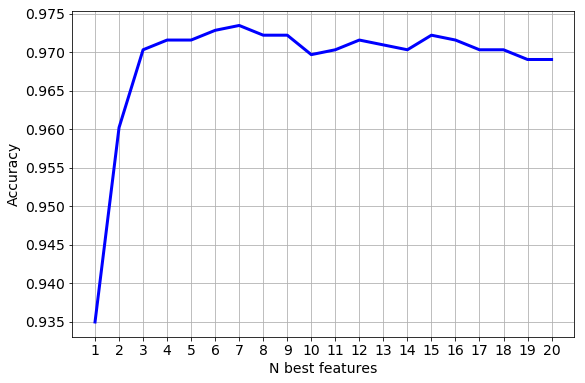

In [14]:
n_best_features = np.arange(1, 21)
n_best_names = feature_names[best_features] # You need to find the correct order
n_best_accuracies = best_accuracy # You need to calculate these accuracies

plt.figure(figsize=(9, 6))
plt.plot(n_best_features, n_best_accuracies, color='b', linewidth=3)
plt.xticks(n_best_features, size=14)
plt.xlabel("N best features", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid(b=1)
plt.show()

In [15]:
report = pd.DataFrame()
report['Name'] = feature_names[best_features]
report['Accuracy'] = best_accuracy
report

,Name,Accuracy
0,meanfun,0.934975
1,Q75,0.960227
2,IQR,0.970328
3,sp.ent,0.971591
4,minfun,0.971591
5,mode,0.972854
6,kurt,0.973485
7,skew,0.972222
8,maxfun,0.972222
9,mindom,0.969697


In [16]:
assert list(report['Name'] == ['meanfun', 'Q75', 'IQR', 'sp.ent', 'minfun', 'mode', 'kurt', 'skew', 'maxfun', 'mindom', 'Q25', 'meanfreq', 'sd', 'sfm', 'median', 'centroid', 'maxdom', 'meandom', 'dfrange', 'modindx'])

# Task 4 (2 points)

Well, now let's use PCA. Plot the dependency of the classification accuracy from the number of components of PCA. Vary the number of components from 1 to 20. Do you have the same accuracies for one PCA component and for the first best feature from Task 1? How do you explain it?

In this task you can use PCA from seminar or PCA from sklearn

The output example:

In [52]:
class MyPCA(object):
    
    def __init__(self, n_components=1):
        """
        This class performs PCA.
        
        Parameters
        ----------
        n_components : int
            Number of the first principle components to use.
        """
        
        self.n_components = n_components
        self.means = None
        self.stds = None
        self.A = None
        self.eig_vals = None
        self.eig_vecs = None
        
        
    def _normalize(self, X, is_fit=True):
        """
        This method centers and scales input data.
        
        Parameters
        ----------
        X : numpy.ndarray
            Input data sample with shape=[n_objects, n_features]
            
        Returns
        -------
        X_center : numpy.ndarray
            Centered and scaled input data sample with shape=[n_objects, n_features]
        """
        if is_fit:
            self.means = X.mean(axis=0)
            self.stds = X.std(axis=0)
            
        X_center = ( X - self.means ) / self.stds
        
        return X_center
        
    
    def fit(self, X):
        """
        This method searches for the first eigenvectors for PCA.
        
        Parameters
        ----------
        X : numpy.ndarray
            Input data smaple with shape=[n_objects, n_features]
        """
        
        # Centering (and scaling)
        X_center = self._normalize(X)
        
        # Calculate covariance matrix
        C = np.dot(X_center.T, X_center)
        
        # Find eigenvalues and eigenvectors
        self.eig_vals, self.eig_vecs = np.linalg.eig(C)
        self.eig_vecs = self.eig_vecs.T
        
        # Sort eigenvalues
        sorted_indeces = self.eig_vals.argsort()[::-1]
        
        # Take the first n_components
        if self.n_components > len(self.eig_vecs):
            print("Are you crazy?! You want more components that I have. I'll give only ", str(len(self.eig_vecs)))
        n_first_indeces = sorted_indeces[:self.n_components]
        self.A = self.eig_vecs[n_first_indeces].T
        
        
    def transform(self, X):
        """
        Performs projections on the selected components.
        
        Parameters
        ----------
        X : numpy.ndarray
            Input data smaple with shape=[n_objects, n_features]
            
        Returns
        -------
        X_pca : numpy.ndarray
            Transformed input data smaple with shape=[n_objects, n_components]
        """
        
        if self.A is None:
            print("Hey! What are you doing? Fit me firstly.")
            return X
        
        # Centering (and scaling)
        X_center = self._normalize(X, is_fit=False)
            
        # Perform projection
        X_pca = np.dot(X_center, self.A)
        
        return X_pca

In [53]:
pca_accuracies = []
for i in range(1, 21):
    pca = MyPCA(n_components=i)
    pca.fit(X_train)
    X_current = pca.transform(X_train)
    X_current_test = pca.transform(X_test)
    clf.fit(X_current, y_train)
    predictions = clf.predict(X_current_test)
    pca_accuracies.append(accuracy_score(y_test, predictions))

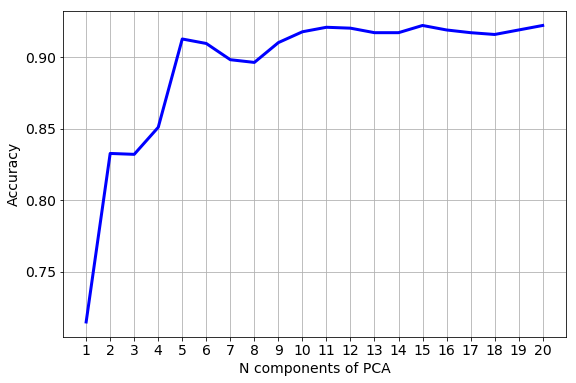

In [54]:
pca_components = np.arange(1, 21)

plt.figure(figsize=(9, 6))
plt.plot(pca_components, pca_accuracies, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("N components of PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid(b=1)
plt.show()

# Task 5 (1 point)

Plot explained variance and cumulative explained variance for the PCA at every number of components.

In [55]:
pca = MyPCA()
pca.fit(X_train)

# Take all eigenvalues
eigenvalues = pca.eig_vals

# Sort eigenvalues
eigenvalues = np.sort(eigenvalues)[::-1]

In [56]:
pca_components = np.arange(1, 21)

# Calculate explained variance
explained_variance = eigenvalues / eigenvalues.sum()

# Calculate cumulative explained variance
cumsum_explained_variance = np.cumsum(explained_variance)

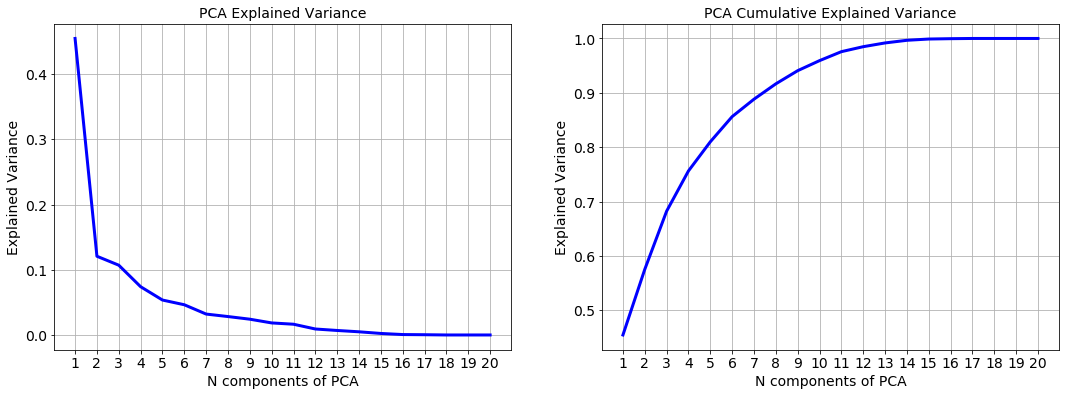

In [57]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(pca_components, explained_variance, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("N components of PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Explained Variance", size=14)
plt.title("PCA Explained Variance", size=14)
plt.grid(b=1)


plt.subplot(1, 2, 2)
plt.plot(pca_components, cumsum_explained_variance, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("N components of PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Explained Variance", size=14)
plt.title("PCA Cumulative Explained Variance", size=14)
plt.grid(b=1)


plt.show()